In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset
dataset = pd.read_csv('vehicles.csv')
dataset.shape

(426880, 26)

In [3]:
dataset

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [4]:
# Now lets drop some columns that we dont need
dataset.drop(['lat','long','region_url','url','VIN','county','id','image_url'],axis=1,inplace=True)
dataset.shape

(426880, 18)

In [5]:
dataset.duplicated().sum()

20

In [6]:
# We can remove the duplicates
dataset=dataset.drop_duplicates(keep='first')

In [7]:
dataset.shape

(426860, 18)

In [9]:
# Using Regular expression
import re

manufacturer = '(gmc | hyundai | toyota | mitsubishi | ford | chevrolet | ram | buick | jeep | dodge | subaru | nissan | audi | rover  | lexus \
| honda | chrysler | mini | pontiac | mercedes-benz | cadillac | bmw | kia | volvo | volkswagen | jaguar | acura | saturn | mazda | \
mercury | lincoln | infiniti | ferrari | fiat | tesla | land rover | harley-davidson | datsun | alfa-romeo | morgan | aston-martin | porche \
| hennessey)'
condition = '(excellent | good | fair | like new | salvage | new)'
fuel = '(gas | hybrid | diesel |electric)'
title_status = '(clean | lien | rebuilt | salvage | missing | parts only)'
transmission = '(automatic | manual)'
drive = '(4x4 | awd | fwd | rwd | 4wd)'
size = '(mid-size | full-size | compact | sub-compact)'
type_ = '(sedan | truck | SUV | mini-van | wagon | hatchback | coupe | pickup | convertible | van | bus | offroad)'
paint_color = '(red | grey | blue | white | custom | silver | brown | black | purple | green | orange | yellow)'
cylinders = '(\s[1-9] cylinders? |\s1[0-6]? cylinders?)'

keys =    ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive','size', 'type', 'paint_color' , 'cylinders']
columns = [ manufacturer,   condition,   fuel,  title_status, transmission ,drive, size, type_, paint_color,   cylinders]

for i,column in zip(keys,columns):
    dataset[i] = dataset[i].fillna(dataset['description'].str.extract(column, flags=re.IGNORECASE, expand=False)).str.lower()

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_4436\3632170212.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = dataset[i].fillna(dataset['description'].str.extract(column, flags=re.IGNORECASE, expand=False)).str.lower()


In [10]:
dataset=dataset.drop('description',axis=1)

In [11]:
dataset

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,red,wy,2021-04-04T03:21:31-0600
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy,2021-04-04T03:21:29-0600
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy,2021-04-04T03:21:17-0600
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy,2021-04-04T03:21:11-0600


In [12]:
columns = ['manufacturer','condition','cylinders','fuel','transmission','drive','size','type','title_status','paint_color']
for i in columns:
    dataset[i] = dataset[i].str.strip()

In [13]:
dataset

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,red,wy,2021-04-04T03:21:31-0600
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy,2021-04-04T03:21:29-0600
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy,2021-04-04T03:21:17-0600
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy,2021-04-04T03:21:11-0600


In [14]:
# Lets handle the outliers in price column
dataset = dataset[(dataset.price <= 30000)&(dataset.price>=500)]
dataset

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426869,wyoming,13990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,other,75626.0,clean,other,fwd,NaN,hatchback,white,wy,2021-04-04T03:50:17-0600
426870,wyoming,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,gas,3066.0,clean,other,fwd,NaN,sedan,blue,wy,2021-04-04T03:40:17-0600
426871,wyoming,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,gas,34239.0,clean,other,NaN,NaN,suv,red,wy,2021-04-04T03:30:20-0600
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,red,wy,2021-04-04T03:21:31-0600


In [15]:
dataset=dataset.drop(['region','cylinders','paint_color','state','posting_date'],axis=1)

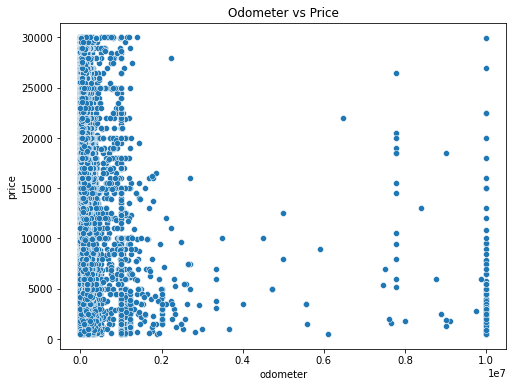

In [16]:
plt.figure(figsize=[8,6])
sx= sns.scatterplot(x=dataset['odometer'],y=dataset['price'])
sx.set_title("Odometer vs Price")
plt.show()

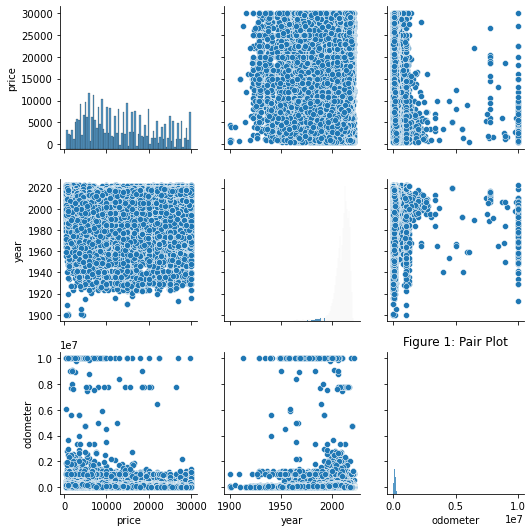

In [17]:
sns.pairplot(dataset)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.show()

In [18]:
# Lets handle the outliers in Odometer column
dataset=dataset[(dataset.odometer <= 500000)& (dataset.odometer != 0)]

In [19]:
dataset.shape

(302355, 12)

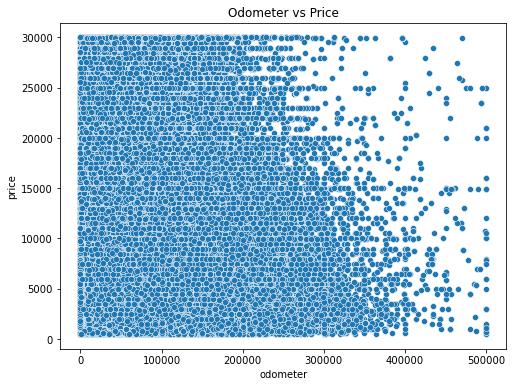

In [20]:
plt.figure(figsize=[8,6])
sx= sns.scatterplot(x=dataset['odometer'],y=dataset['price'])
sx.set_title("Odometer vs Price")
plt.show()

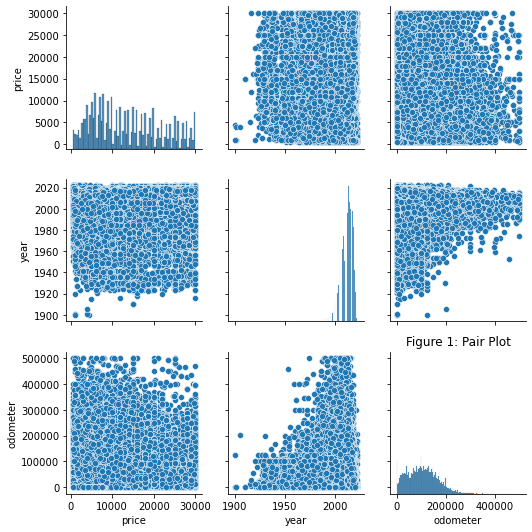

In [21]:
sns.pairplot(dataset)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.show()


In [22]:
dataset=dataset[(dataset.year > 2000)]

In [23]:
dataset.shape

(276848, 12)

In [24]:
processed_dataset = dataset

In [25]:
processed_dataset.shape

(276848, 12)

In [26]:
# Now we need to fill the null values
d1=(processed_dataset['odometer']<=100000)
d2=(processed_dataset['odometer']>100000)


In [27]:
# Replaced null values in odometer column with excellent and good in respective range
processed_dataset.loc[d1,'odometer'] = processed_dataset.loc[d1,'odometer'].fillna("excellent")
processed_dataset.loc[d2,'odometer'] = processed_dataset.loc[d2,'odometer'].fillna("good")

In [28]:
null_count=pd.DataFrame({'Null':processed_dataset.isnull().sum()})
total = len(processed_dataset)
percentage_null = round((null_count['Null']/total)*100,1)
null_count['Percentage']=percentage_null
null_count

,Null,Percentage
price,0,0.0
year,0,0.0
manufacturer,5874,2.1
model,2206,0.8
condition,53081,19.2
fuel,1345,0.5
odometer,0,0.0
title_status,4619,1.7
transmission,910,0.3
drive,62934,22.7


In [29]:
# As we have less null values in some columns, we are going to drop those rows
processed_dataset=processed_dataset.dropna(subset=['manufacturer','model','fuel','title_status','transmission'])

In [30]:
processed_dataset.shape

(262432, 12)

In [31]:
# Dropping the size column as it has more null values
processed_dataset=processed_dataset.drop(['size'],axis=1)

In [32]:
# Now we will fill null values using ffill method in other columns
columns=['condition','drive','type']
for i in columns:
    processed_dataset[i]=processed_dataset[i].fillna(method='ffill')

In [33]:
processed_dataset

,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,drive,type
28,22590,2010.0,chevrolet,silverado 1500,good,gas,71229.0,clean,other,NaN,pickup
31,15000,2013.0,ford,f-150 xlt,excellent,gas,128000.0,clean,automatic,rwd,truck
32,27990,2012.0,gmc,sierra 2500 hd extended cab,good,gas,68696.0,clean,other,4wd,pickup
35,29990,2016.0,chevrolet,colorado extended cab,good,gas,17302.0,clean,other,4wd,pickup
39,24590,2017.0,chevrolet,silverado 1500 regular,good,gas,40784.0,clean,other,4wd,pickup
...,...,...,...,...,...,...,...,...,...,...,...
426867,28990,2018.0,jaguar,xe 25t prestige sedan 4d,good,other,16841.0,clean,other,rwd,sedan
426870,22990,2020.0,hyundai,sonata se sedan 4d,good,gas,3066.0,clean,other,fwd,sedan
426871,17990,2018.0,kia,sportage lx sport utility 4d,good,gas,34239.0,clean,other,fwd,suv
426875,23590,2019.0,nissan,maxima s sedan 4d,good,gas,32226.0,clean,other,fwd,sedan


In [34]:
# Checking the null values
null_count=pd.DataFrame({'Null':processed_dataset.isnull().sum()})
total = len(processed_dataset)
percentage_null = round((null_count['Null']/total)*100,1)
null_count['Percentage']=percentage_null
null_count

,Null,Percentage
price,0,0.0
year,0,0.0
manufacturer,0,0.0
model,0,0.0
condition,0,0.0
fuel,0,0.0
odometer,0,0.0
title_status,0,0.0
transmission,0,0.0
drive,1,0.0


In [35]:
# Removing that one null value in drive column
processed_dataset=processed_dataset.dropna(subset=['drive'])
# All the null values are removed

In [36]:
# Now the columns condition and title_status are linked and are similar so combining both the columns and then we drop them
processed_dataset['status']=processed_dataset['condition'] + '&' + processed_dataset['title_status']
processed_dataset=processed_dataset.drop(['condition','title_status'],axis=1)

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_4436\3816291201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_dataset['status']=processed_dataset['condition'] + '&' + processed_dataset['title_status']


In [37]:
processed_dataset

,price,year,manufacturer,model,fuel,odometer,transmission,drive,type,status
31,15000,2013.0,ford,f-150 xlt,gas,128000.0,automatic,rwd,truck,excellent&clean
32,27990,2012.0,gmc,sierra 2500 hd extended cab,gas,68696.0,other,4wd,pickup,good&clean
35,29990,2016.0,chevrolet,colorado extended cab,gas,17302.0,other,4wd,pickup,good&clean
39,24590,2017.0,chevrolet,silverado 1500 regular,gas,40784.0,other,4wd,pickup,good&clean
41,27990,2014.0,toyota,tacoma access cab pickup,other,17805.0,other,4wd,pickup,good&clean
...,...,...,...,...,...,...,...,...,...,...
426867,28990,2018.0,jaguar,xe 25t prestige sedan 4d,other,16841.0,other,rwd,sedan,good&clean
426870,22990,2020.0,hyundai,sonata se sedan 4d,gas,3066.0,other,fwd,sedan,good&clean
426871,17990,2018.0,kia,sportage lx sport utility 4d,gas,34239.0,other,fwd,suv,good&clean
426875,23590,2019.0,nissan,maxima s sedan 4d,gas,32226.0,other,fwd,sedan,good&clean


In [38]:
# Now we need to change all the categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
features = ['manufacturer','model','fuel','drive','status','type','transmission']
encoder = LabelEncoder()
encoded = processed_dataset[features].apply(encoder.fit_transform)
processed_dataset.drop(features, axis=1, inplace=True)
processed_dataset = pd.concat([encoded,processed_dataset],axis = 1) 
processed_dataset.head(1)

,manufacturer,model,fuel,drive,status,type,transmission,price,year,odometer
31,12,6866,2,4,0,10,0,15000,2013.0,128000.0


In [39]:
processed_dataset.columns

Index(['manufacturer', 'model', 'fuel', 'drive', 'status', 'type',
       'transmission', 'price', 'year', 'odometer'],
      dtype='object')

In [40]:
# We are keeping the target variable at the end 
new_columns = ['manufacturer', 'model', 'fuel', 'transmission',
       'drive', 'type', 'status', 'year',
       'odometer' , 'price']

processed_dataset = processed_dataset.reindex(columns = new_columns ) 
processed_dataset

,manufacturer,model,fuel,transmission,drive,type,status,year,odometer,price
31,12,6866,2,0,4,10,0,2013.0,128000.0,15000
32,13,12955,2,2,0,7,12,2012.0,68696.0,27990
35,7,4548,2,2,0,7,12,2016.0,17302.0,29990
39,7,13150,2,2,0,7,12,2017.0,40784.0,24590
41,38,14007,4,2,0,7,12,2014.0,17805.0,27990
...,...,...,...,...,...,...,...,...,...,...
426867,18,15711,4,2,4,8,12,2018.0,16841.0,28990
426870,16,13511,2,2,3,8,12,2020.0,3066.0,22990
426871,20,13738,2,2,3,9,12,2018.0,34239.0,17990
426875,30,10014,2,2,3,8,12,2019.0,32226.0,23590


In [41]:
#Split dataset into Training and Test Set

X = processed_dataset.iloc[:,:-1]  #independent columns
y = processed_dataset.iloc[:,-1]    #target column i.e price range

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [42]:
X_train.head(5)

,manufacturer,model,fuel,transmission,drive,type,status,year,odometer
322037,4,1428,2,0,0,8,0,2010.0,106008.0
177856,38,3799,2,0,0,10,12,2002.0,95000.0
58460,7,3747,2,0,0,2,12,2013.0,84015.0
340646,28,10924,2,0,0,9,12,2019.0,31170.0
111998,12,6719,2,0,3,7,24,2001.0,166107.0


In [43]:
print('Final Training data shape',X_train.shape)
print('Final Test data shape',X_test.shape)

Final Training data shape (223066, 9)
Final Test data shape (39365, 9)


In [44]:
df = processed_dataset
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.85,test_size=0.15,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(df,list(range(len(list(df.columns))-1)))



In [45]:

#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)
#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])

In [46]:
#fitting model
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [47]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

NameError: name 'mean_squared_log_error' is not defined

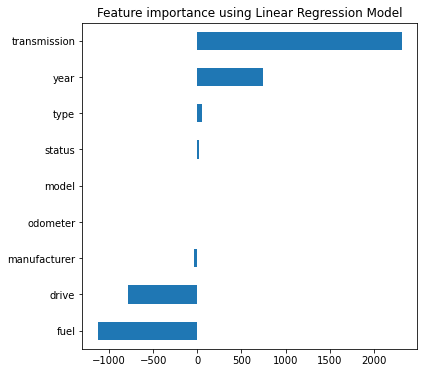

In [48]:
#Ploting feature importance graph
import matplotlib
coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

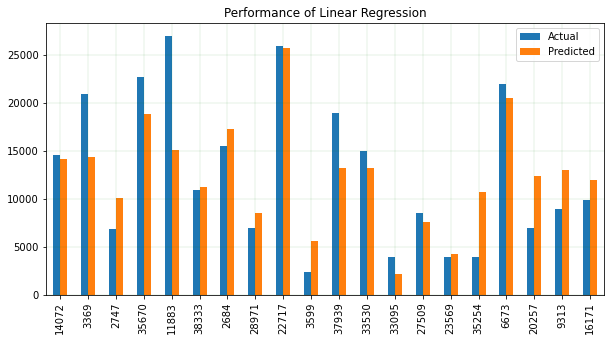

In [49]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

In [52]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

NameError: name 'KNeighborsRegressor' is not defined

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

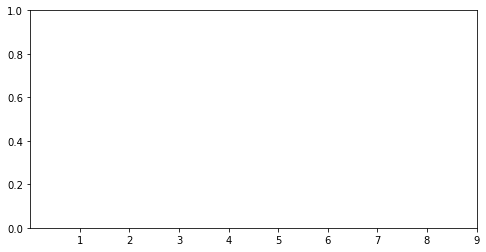

In [53]:
#plotting error

curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.5543675448979565
K = 2  , Root MSLE = 0.5137640850963199
K = 3  , Root MSLE = 0.5095058222840947
K = 4  , Root MSLE = 0.5134515532717362
K = 5  , Root MSLE = 0.519014955688285
K = 6  , Root MSLE = 0.5240216266442769
K = 7  , Root MSLE = 0.5295508858383566
K = 8  , Root MSLE = 0.5340839876364682
K = 9  , Root MSLE = 0.5383537832361132


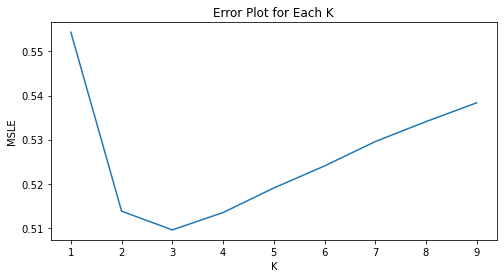

In [55]:
#plotting error

curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [56]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=5) 
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [57]:
#model evaluation
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 0.2693765242281125
Root MSLE : 0.519014955688285
R2 Score : 0.6480891157545157 or 64.8089%


In [58]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)


NameError: name 'RandomForestRegressor' is not defined

In [59]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.2693765242281125
Root MSLE : 0.519014955688285
R2 Score : 0.6480891157545157 or 64.8089%


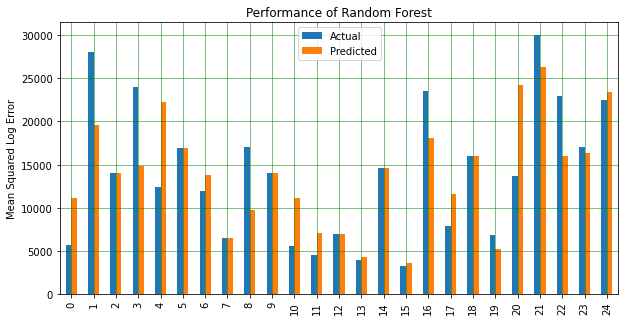

In [60]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()